# DM 팀프로젝트 5팀 뽀얌쿵야 코드
#### 추가로 Grid Search가 몇 분 이상 걸리는 부분은 주석 처리 해놓았습니다

In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("뽀얌쿵야_데이터마이닝_전처리데이터.csv")

In [3]:
df['피해운전자 상해정도'] = df['피해운전자 상해정도'].replace({'부상신고': '경상', '사망': '중상'})

In [4]:
df

,Unnamed: 0,사고일시,요일,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,계절,시간대,구,동
0,0,2020-01-01 05:00:00,수요일,차대사람,안전운전불이행,건조,맑음,단일로,승용,남,63.0,보행자,여,29.0,중상,겨울,새벽,강남구,도곡동
1,1,2020-01-01 07:00:00,수요일,차대차,안전운전불이행,건조,맑음,단일로,승용,남,29.0,승용,남,41.0,경상,겨울,오전,강남구,논현동
2,3,2020-01-01 18:00:00,수요일,차대사람,큰 위반,건조,맑음,단일로,승용,남,44.0,보행자,남,42.0,경상,겨울,오후,강남구,삼성동
3,4,2020-01-01 18:00:00,수요일,차대차,작은 위반,건조,맑음,교차로,승용,여,47.0,승용,남,34.0,경상,겨울,오후,강남구,역삼동
4,6,2020-01-01 22:00:00,수요일,차대차,안전운전불이행,건조,맑음,단일로,승합,남,50.0,승합,남,51.0,경상,겨울,밤,강남구,삼성동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96842,118149,2022-12-30 18:00:00,금요일,차대차,안전운전불이행,건조,맑음,단일로,승합,남,51.0,승용,여,44.0,중상,겨울,오후,중랑구,중화동
96843,118150,2022-12-30 20:00:00,금요일,차대차,안전운전불이행,건조,맑음,교차로,승용,남,39.0,승용,남,34.0,중상,겨울,밤,중랑구,망우동
96844,118152,2022-12-31 14:00:00,토요일,차대차,안전운전불이행,습기,맑음,단일로,승합,남,39.0,이륜,남,70.0,경상,겨울,오후,중랑구,면목동
96845,118153,2022-12-31 19:00:00,토요일,차대차,작은 위반,건조,맑음,교차로,승용,여,53.0,이륜,남,25.0,경상,겨울,밤,중랑구,신내동


# 타겟변수 나누기

In [6]:
X = df.drop(['Unnamed: 0', '사고일시', '피해운전자 상해정도',], axis=1)
y = df['피해운전자 상해정도']
print(X.shape)
print(y.shape)
print(df['피해운전자 상해정도'].value_counts())
X.head()

(96847, 16)
(96847,)
피해운전자 상해정도
경상      66670
중상      18320
상해없음    11857
Name: count, dtype: int64


,요일,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,피해운전자 차종,피해운전자 성별,피해운전자 연령,계절,시간대,구,동
0,수요일,차대사람,안전운전불이행,건조,맑음,단일로,승용,남,63.0,보행자,여,29.0,겨울,새벽,강남구,도곡동
1,수요일,차대차,안전운전불이행,건조,맑음,단일로,승용,남,29.0,승용,남,41.0,겨울,오전,강남구,논현동
2,수요일,차대사람,큰 위반,건조,맑음,단일로,승용,남,44.0,보행자,남,42.0,겨울,오후,강남구,삼성동
3,수요일,차대차,작은 위반,건조,맑음,교차로,승용,여,47.0,승용,남,34.0,겨울,오후,강남구,역삼동
4,수요일,차대차,안전운전불이행,건조,맑음,단일로,승합,남,50.0,승합,남,51.0,겨울,밤,강남구,삼성동


# 범주형 변수를 더미변수로 변환

In [7]:
X = pd.get_dummies(X)
print(X.shape)
print(y.shape)

(96847, 536)
(96847,)


In [8]:
X.head()

,가해운전자 연령,피해운전자 연령,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,사고유형_차대사람,...,동_회현동1가,동_회현동2가,동_효자동,동_효제동,동_효창동,동_후암동,동_훈정동,동_휘경동,동_흑석동,동_흥인동
0,63.0,29.0,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,29.0,41.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,44.0,42.0,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,47.0,34.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50.0,51.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# EDA

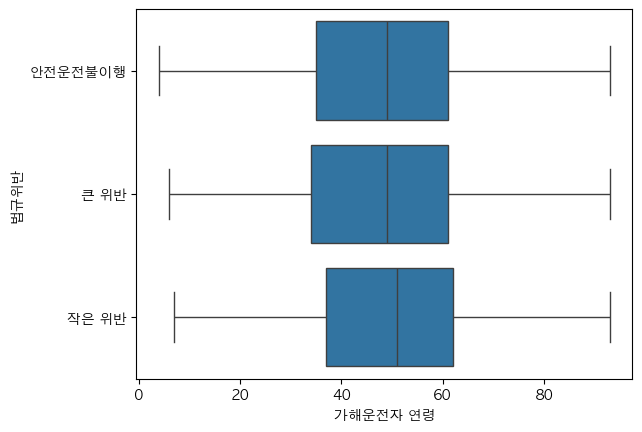

In [9]:
sns.boxplot(data=df, y="법규위반", x="가해운전자 연령")
plt.show()

/var/folders/z9/b0_p9_w56d539_ntgw6cc_xw0000gn/T/ipykernel_39109/580042705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='피해운전자 상해정도', data=df, palette='Set1')


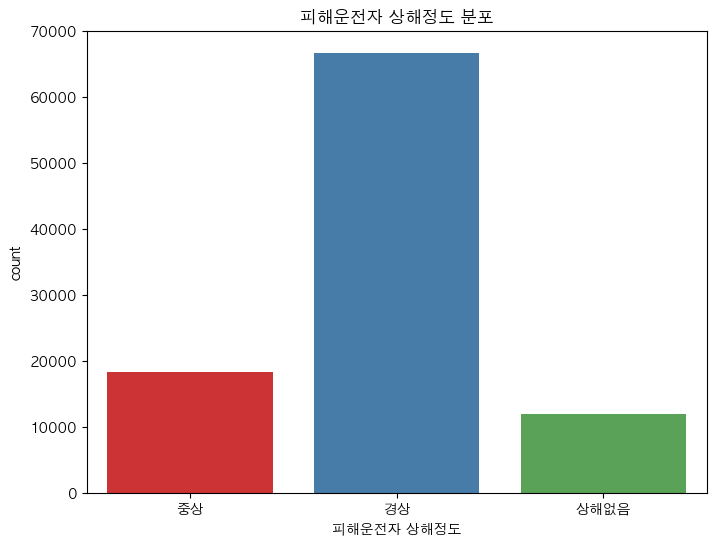

In [10]:
# 전체적인 피해 상태 분포
plt.figure(figsize=(8, 6))
sns.countplot(x='피해운전자 상해정도', data=df, palette='Set1') 
plt.title('피해운전자 상해정도 분포')
plt.show()

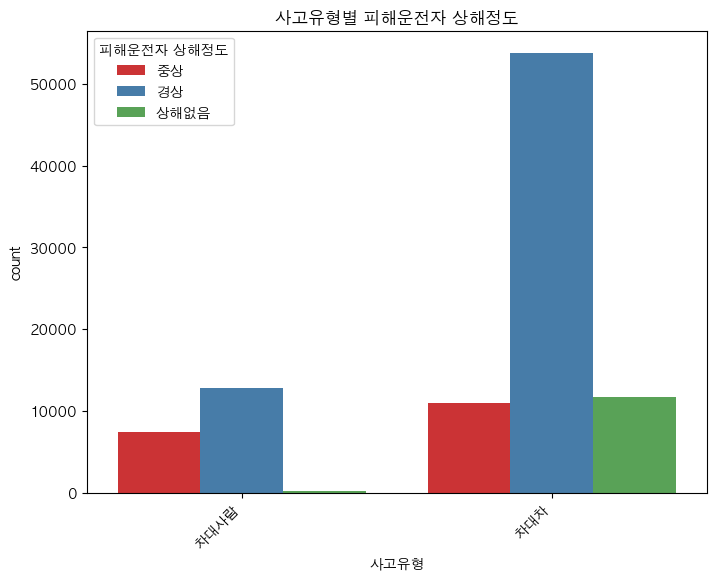

In [11]:
# 사고유형별 피해 상태 분포
plt.figure(figsize=(8, 6))
sns.countplot(x='사고유형', hue='피해운전자 상해정도', data=df, palette='Set1') 
plt.title('사고유형별 피해운전자 상해정도')
plt.xticks(rotation=45, ha='right')
plt.show()

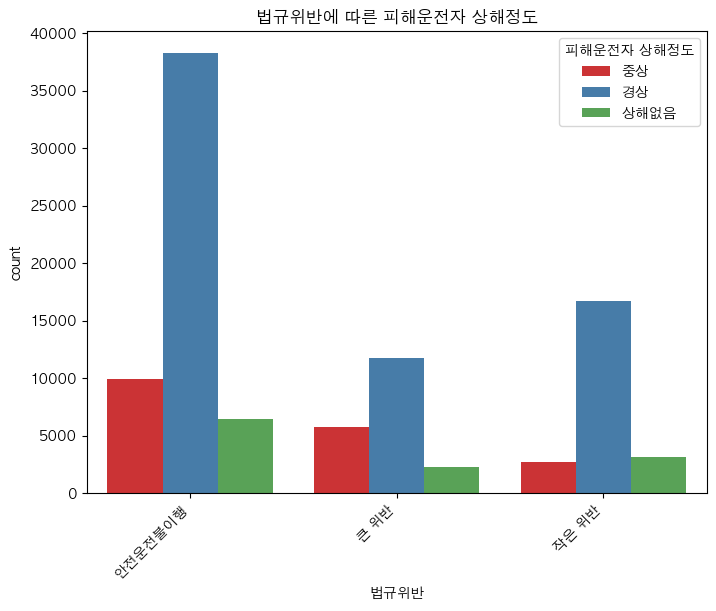

In [12]:
# 법규위반에 따른 피해 상태 분포
plt.figure(figsize=(8, 6))
sns.countplot(x='법규위반', hue='피해운전자 상해정도', data=df, palette='Set1')  
plt.title('법규위반에 따른 피해운전자 상해정도')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/z9/b0_p9_w56d539_ntgw6cc_xw0000gn/T/ipykernel_39109/4170056181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='가해운전자 연령', y='법규위반', data=df, palette='Set1')


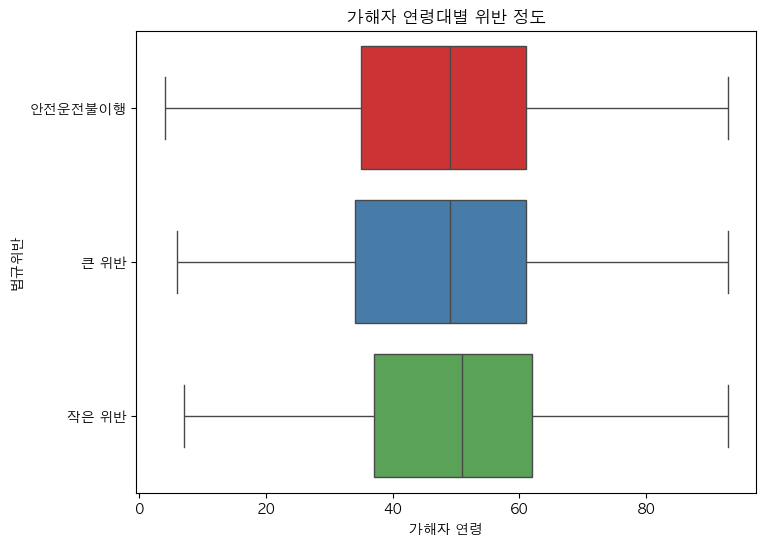

In [13]:
# 가해자 연령대별 위반 정도 박스플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='가해운전자 연령', y='법규위반', data=df, palette='Set1')
plt.title('가해자 연령대별 위반 정도')
plt.xlabel('가해자 연령')
plt.ylabel('법규위반')
plt.show()

# Train Set 과 Test Set설정

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Train Set 갯수
class_counts_train = y_train.value_counts()
print(class_counts_train)

# Test Set 갯수
class_counts_test = y_test.value_counts()
print(class_counts_test)

피해운전자 상해정도
경상      46664
중상      12869
상해없음     8259
Name: count, dtype: int64
피해운전자 상해정도
경상      20006
중상       5451
상해없음     3598
Name: count, dtype: int64


# Train Set과 Test Set 설정 / UnderSampling 기존 비율 (1:1:1)

In [16]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rus = RandomUnderSampler(sampling_strategy={'상해없음': 11857, '중상': 11857, '경상': 11857}, random_state=42)
X_resampled1, y_resampled1 = rus.fit_resample(X, y)

In [17]:
# 범주형 변수를 더미 변수로 변환
X_resampled1 = pd.get_dummies(X_resampled1)
print(X_resampled1.shape)

(35571, 536)


In [18]:
# 훈련 데이터와 테스트 데이터 분할 및 가중치 부여
X_resampled_train1, X_resampled_test1, y_resampled_train1, y_resampled_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.3, random_state=42)

In [19]:
# Train Set 갯수
class_counts_train = y_resampled_train1.value_counts()
print(class_counts_train)

#Test Set 갯수
class_counts_test = y_resampled_test1.value_counts()
print(class_counts_test)

피해운전자 상해정도
경상      8307
상해없음    8305
중상      8287
Name: count, dtype: int64
피해운전자 상해정도
중상      3570
상해없음    3552
경상      3550
Name: count, dtype: int64


# Train Set과 Test Set 설정 / UnderSampling 수정 비율 (1:1:2)

In [20]:
rus = RandomUnderSampler(sampling_strategy={'상해없음': 11857, '중상': 11857, '경상': 23714}, random_state=42)
X_resampled2, y_resampled2 = rus.fit_resample(X, y)

In [21]:
# 범주형 변수를 더미 변수로 변환
X_resampled2 = pd.get_dummies(X_resampled2)
print(X_resampled2.shape)

(47428, 536)


In [22]:
# 훈련 데이터와 테스트 데이터 분할 및 가중치 부여
X_resampled_train2, X_resampled_test2, y_resampled_train2, y_resampled_test2 = train_test_split(X_resampled2, y_resampled2, test_size=0.3, random_state=42)

In [23]:
# Train Set 갯수
class_counts_train = y_resampled_train2.value_counts()
print(class_counts_train)

#Test Set 갯수
class_counts_test = y_resampled_test2.value_counts()
print(class_counts_test)

피해운전자 상해정도
경상      16576
중상       8371
상해없음     8252
Name: count, dtype: int64
피해운전자 상해정도
경상      7138
상해없음    3605
중상      3486
Name: count, dtype: int64


# DT / Not Undersampling

### 그리드서치

In [24]:
from sklearn.model_selection import GridSearchCV

# param_grid_DT ={
#     'max_depth' : list(range(2,16)),
#     'min_samples_leaf' : list(range(1,6)),
#     'min_samples_split' : list(range(2,6)),
#     'random_state' : [10]
# }

# model_DT = DecisionTreeClassifier()

# grid_search_DT = GridSearchCV(model_DT, param_grid_DT, n_jobs=-1 ,cv=5, scoring='accuracy')
# grid_search_DT.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search_DT.best_params_)

### DT

In [25]:
tree1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state=10)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=10)

### 정확도

In [26]:
print("Training set의 정확도: {:.3f}".format(tree1.score(X_train, y_train)))
print("Test set의 정확도: {:.3f}".format(tree1.score(X_test, y_test)))

Training set의 정확도: 0.745
Test set의 정확도: 0.743


In [27]:
from sklearn.metrics import classification_report

y_pred_tree1 = tree1.predict(X_test)

# 클래스별 정확도 및 리포트 출력
class_accuracy_tree1 = classification_report(y_test, y_pred_tree1)
print('Decision Tree 클래스별 리포트:')
print(class_accuracy_tree1)

Decision Tree 클래스별 리포트:
              precision    recall  f1-score   support

          경상       0.76      0.91      0.83     20006
        상해없음       0.71      0.60      0.65      3598
          중상       0.56      0.20      0.30      5451

    accuracy                           0.74     29055
   macro avg       0.68      0.57      0.59     29055
weighted avg       0.72      0.74      0.71     29055



### 특성중요도 / DT not undersamping

In [28]:
import matplotlib.pyplot as plt

# 특성 중요도 얻기
feature_importances_DT = tree1.feature_importances_

# 특성 중요도를 특성 이름과 함께 매핑
feature_importance_dict_DT = dict(zip(X.columns, feature_importances_DT))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importance = sorted(feature_importance_dict_DT.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break

가해운전자 차종_자전거: 0.26069347755287914
가해운전자 차종_이륜: 0.23362331030254901
피해운전자 차종_승용: 0.16959915168407488
피해운전자 차종_승합: 0.11296845602137814
피해운전자 연령: 0.10105570162161813
피해운전자 차종_화물: 0.055094518120274376
법규위반_큰 위반: 0.025995335561776068
가해운전자 차종_승용: 0.014245190583166261
가해운전자 차종_화물: 0.0071844303760294865
법규위반_작은 위반: 0.0037509607902735044


# DT / Undersampling

### 그리드 서치

In [29]:
# grid_search_DT1 = GridSearchCV(model_DT, param_grid_DT, n_jobs=-1 ,cv=5, scoring='accuracy')
# grid_search_DT1.fit(X_resampled_train1, y_resampled_train1)

# print("Best Hyperparameters:", grid_search_DT1.best_params_)

### DT

In [30]:
tree2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=2, random_state=10)
tree2.fit(X_resampled_train1, y_resampled_train1)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=10)

### 정확도

In [31]:
print("Training set의 정확도: {:.3f}".format(tree2.score(X_resampled_train1, y_resampled_train1)))
print("Test set의 정확도: {:.3f}".format(tree2.score(X_resampled_test1, y_resampled_test1)))

Training set의 정확도: 0.689
Test set의 정확도: 0.678


In [32]:
y_pred_tree2 = tree2.predict(X_resampled_test1)

# 클래스별 정확도 및 리포트 출력
class_accuracy_tree2 = classification_report(y_resampled_test1, y_pred_tree2)
print('Decision Tree 클래스별 리포트:')
print(class_accuracy_tree2)

Decision Tree 클래스별 리포트:
              precision    recall  f1-score   support

          경상       0.54      0.61      0.57      3550
        상해없음       0.88      0.71      0.79      3552
          중상       0.66      0.71      0.69      3570

    accuracy                           0.68     10672
   macro avg       0.70      0.68      0.68     10672
weighted avg       0.70      0.68      0.68     10672



### 특성중요도 / DT undersampling 1:1:1

In [33]:
# 특성 중요도 얻기
feature_importances_DT2 = tree2.feature_importances_

# 특성 중요도를 특성 이름과 함께 매핑
feature_importance_dict_DT2 = dict(zip(X.columns, feature_importances_DT2))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importance = sorted(feature_importance_dict_DT2.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break

가해운전자 차종_승용: 0.2078829447843267
사고유형_차대차: 0.20760831668416643
피해운전자 차종_이륜: 0.17732524114563997
가해운전자 차종_화물: 0.08880750548562881
피해운전자 차종_승합: 0.06845076980994774
피해운전자 차종_자전거: 0.06717052844418443
피해운전자 연령: 0.06440590282371308
가해운전자 차종_승합: 0.034420933260580565
가해운전자 차종_특수: 0.01901728897512064
가해운전자 차종_자전거: 0.014313434674915918


# DT / Under Sampling 수정비율

### 그리드 서치

In [34]:
# grid_search_DT2 = GridSearchCV(model_DT, param_grid_DT, n_jobs=-1 ,cv=5, scoring='accuracy')
# grid_search_DT2.fit(X_resampled_train2, y_resampled_train2)

# print("Best Hyperparameters:", grid_search_DT2.best_params_)

### DT

In [35]:
tree3 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=4, random_state=10)
tree3.fit(X_resampled_train2, y_resampled_train2)

DecisionTreeClassifier(max_depth=7, min_samples_split=4, random_state=10)

### 정확도

In [36]:
print("Training set의 정확도: {:.3f}".format(tree3.score(X_resampled_train2, y_resampled_train2)))
print("Test set의 정확도: {:.3f}".format(tree3.score(X_resampled_test2, y_resampled_test2)))

Training set의 정확도: 0.693
Test set의 정확도: 0.682


In [37]:
y_pred_tree3 = tree3.predict(X_resampled_test2)

# 클래스별 정확도 및 리포트 출력
class_accuracy_tree3 = classification_report(y_resampled_test2, y_pred_tree3)
print('Decision Tree 클래스별 리포트:')
print(class_accuracy_tree3)

Decision Tree 클래스별 리포트:
              precision    recall  f1-score   support

          경상       0.67      0.78      0.72      7138
        상해없음       0.80      0.71      0.75      3605
          중상       0.59      0.46      0.51      3486

    accuracy                           0.68     14229
   macro avg       0.69      0.65      0.66     14229
weighted avg       0.68      0.68      0.68     14229



### 특성중요도 / DT undersampling 1:1:2

In [38]:
# 특성 중요도 얻기
feature_importances_DT3 = tree3.feature_importances_

# 특성 중요도를 특성 이름과 함께 매핑
feature_importance_dict_DT3 = dict(zip(X.columns, feature_importances_DT3))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importance = sorted(feature_importance_dict_DT2.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break

가해운전자 차종_승용: 0.2078829447843267
사고유형_차대차: 0.20760831668416643
피해운전자 차종_이륜: 0.17732524114563997
가해운전자 차종_화물: 0.08880750548562881
피해운전자 차종_승합: 0.06845076980994774
피해운전자 차종_자전거: 0.06717052844418443
피해운전자 연령: 0.06440590282371308
가해운전자 차종_승합: 0.034420933260580565
가해운전자 차종_특수: 0.01901728897512064
가해운전자 차종_자전거: 0.014313434674915918


# Random Forest

### Random Forest

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 랜덤 포레스트 모델 구축
rf_model1 = RandomForestClassifier(n_estimators=150, max_depth=50, min_samples_split=30, min_samples_leaf=4, random_state=42)
rf_model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=30,
                       n_estimators=150, random_state=42)

### 정확도

In [40]:
# 훈련 세트 정확도 평가
y_train_pred1 = rf_model1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred1)
print(f"훈련 세트 정확도: {train_accuracy}")

# 테스트 세트 정확도 평가
y_test_pred1 = rf_model1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred1)
print(f"테스트 세트 정확도: {test_accuracy}")

훈련 세트 정확도: 0.7661523483596885
테스트 세트 정확도: 0.7446911030803648


In [41]:
from sklearn.metrics import classification_report

# 예측
y_pred_rf1 = rf_model1.predict(X_test)

# classification report 생성
classification_rep1 = classification_report(y_test, y_pred_rf1)

# 리포트 출력
print("Classification Report:\n", classification_rep1)

Classification Report:
               precision    recall  f1-score   support

          경상       0.74      0.96      0.84     20006
        상해없음       0.78      0.51      0.62      3598
          중상       0.68      0.10      0.17      5451

    accuracy                           0.74     29055
   macro avg       0.74      0.52      0.54     29055
weighted avg       0.74      0.74      0.69     29055



### 특성중요도  / RF not undersampling

In [42]:
import matplotlib.pyplot as plt

# 랜덤 포레스트 모델에서 특성 중요도 얻기
feature_importances_rf1 = rf_model1.feature_importances_

# 특성 중요도를 특성 이름과 함께 매핑
feature_importance_dict_rf1 = dict(zip(X.columns, feature_importances_rf1))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importance_rf = sorted(feature_importance_dict_rf1.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importance_rf:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break


가해운전자 차종_이륜: 0.10464035419920796
가해운전자 차종_자전거: 0.09382332505439062
피해운전자 연령: 0.0885144256497034
피해운전자 차종_승용: 0.07616130203782394
가해운전자 차종_승용: 0.07522943988523703
피해운전자 차종_이륜: 0.051037672077750416
피해운전자 차종_승합: 0.04430707314390203
가해운전자 연령: 0.03616585781152749
피해운전자 차종_보행자: 0.03174020709094868
사고유형_차대사람: 0.028338638253981394


# Random Forest / Undersampling

### Random Forest

In [43]:
rf_model2 = RandomForestClassifier(n_estimators=150, max_depth=50, min_samples_split=30, min_samples_leaf=4, random_state=42)
rf_model2.fit(X_resampled_train1, y_resampled_train1)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=30,
                       n_estimators=150, random_state=42)

In [44]:
# 훈련 세트 정확도 평가
y_train_pred2 = rf_model2.predict(X_resampled_train1)
train_accuracy2 = accuracy_score(y_resampled_train1, y_train_pred2)
print(f"훈련 세트 정확도: {train_accuracy2}")

# 테스트 세트 정확도 평가
y_test_pred2 = rf_model2.predict(X_resampled_test1)
test_accuracy2 = accuracy_score(y_resampled_test1, y_test_pred2)
print(f"테스트 세트 정확도: {test_accuracy2}")

훈련 세트 정확도: 0.7153700951845455
테스트 세트 정확도: 0.6806596701649176


In [45]:
# 예측
y_pred_rf2 = rf_model2.predict(X_resampled_test1)

# classification report 생성
classification_rep2 = classification_report(y_resampled_test1, y_pred_rf2)

# 리포트 출력
print("Classification Report:\n", classification_rep2)

Classification Report:
               precision    recall  f1-score   support

          경상       0.57      0.52      0.54      3550
        상해없음       0.82      0.77      0.79      3552
          중상       0.66      0.75      0.70      3570

    accuracy                           0.68     10672
   macro avg       0.68      0.68      0.68     10672
weighted avg       0.68      0.68      0.68     10672



### 특성 중요도 / RF undersampling 1:1:1

In [46]:
import matplotlib.pyplot as plt

# 랜덤 포레스트 모델에서 특성 중요도 얻기
feature_importances_rf2 = rf_model2.feature_importances_

# 특성 중요도를 특성 이름과 함께 매핑
feature_importance_dict_rf2 = dict(zip(X.columns, feature_importances_rf2))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importance_rf2 = sorted(feature_importance_dict_rf2.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importance_rf2:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break


가해운전자 차종_이륜: 0.09938966135256151
가해운전자 차종_승용: 0.09505562822056128
피해운전자 차종_이륜: 0.08636799777188124
피해운전자 차종_승용: 0.07842436253449779
가해운전자 차종_자전거: 0.06456746663039804
피해운전자 차종_보행자: 0.0628370322109238
피해운전자 차종_승합: 0.061356551862080964
사고유형_차대사람: 0.05949332103020808
피해운전자 연령: 0.05632144674944618
사고유형_차대차: 0.05216637361032439


# Random Forest / Undersampling 수정비율

### Random Forest

In [47]:
rf_model3 = RandomForestClassifier(n_estimators=150, max_depth=50, min_samples_split=30, min_samples_leaf=4, random_state=42)
rf_model3.fit(X_resampled_train2, y_resampled_train2)

RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=30,
                       n_estimators=150, random_state=42)

In [48]:
# 훈련 세트 정확도 평가
y_train_pred3 = rf_model3.predict(X_resampled_train2)
train_accuracy3 = accuracy_score(y_resampled_train2, y_train_pred3)
print(f"훈련 세트 정확도: {train_accuracy3}")

# 테스트 세트 정확도 평가
y_test_pred3 = rf_model3.predict(X_resampled_test2)
test_accuracy3 = accuracy_score(y_resampled_test2, y_test_pred3)
print(f"테스트 세트 정확도: {test_accuracy3}")

훈련 세트 정확도: 0.7267387571914816
테스트 세트 정확도: 0.6882423220184131


In [49]:
# 예측
y_pred_rf3 = rf_model3.predict(X_resampled_test2)

# classification report 생성
classification_rep3 = classification_report(y_resampled_test2, y_pred_rf3)

# 리포트 출력
print("Classification Report:\n", classification_rep3)

Classification Report:
               precision    recall  f1-score   support

          경상       0.66      0.82      0.73      7138
        상해없음       0.81      0.71      0.76      3605
          중상       0.63      0.39      0.48      3486

    accuracy                           0.69     14229
   macro avg       0.70      0.64      0.66     14229
weighted avg       0.69      0.69      0.68     14229



### 특성중요도  / RF undersampling 1:1:2

In [50]:
import matplotlib.pyplot as plt

# 랜덤 포레스트 모델에서 특성 중요도 얻기
feature_importances_rf3 = rf_model3.feature_importances_

# 특성 중요도를 특성 이름과 함께 매핑
feature_importance_dict_rf3 = dict(zip(X.columns, feature_importances_rf3))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importance_rf3 = sorted(feature_importance_dict_rf3.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importance_rf3:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break


가해운전자 차종_이륜: 0.11919700782630327
가해운전자 차종_승용: 0.10529811975072075
가해운전자 차종_자전거: 0.08657657240916096
피해운전자 연령: 0.07284158640484086
피해운전자 차종_이륜: 0.06911031828810735
피해운전자 차종_승용: 0.06553018422209105
피해운전자 차종_승합: 0.052303628998820545
피해운전자 차종_보행자: 0.045351432432030256
사고유형_차대사람: 0.039611394828333917
사고유형_차대차: 0.03910830877573927


# NB / Not undersampling

In [51]:
from sklearn.naive_bayes import MultinomialNB

### 그리드 서치

In [52]:
param_grid_NB = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

model_NB = MultinomialNB()

# 그리드서치 수행
grid_search_NB1 = GridSearchCV(model_NB, param_grid_NB, cv=5, scoring='accuracy')
grid_search_NB1.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search_NB1.best_params_)

Best Hyperparameters: {'alpha': 10.0}


### NB

In [53]:
model_NB1 = MultinomialNB(alpha=10)
model_NB1.fit(X_train, y_train)

MultinomialNB(alpha=10)

### 정확도

In [54]:
print("Training set의 정확도: {:.3f}".format(model_NB1.score(X_train, y_train)))
print("Test set의 정확도: {:.3f}".format(model_NB1.score(X_test, y_test)))

Training set의 정확도: 0.668
Test set의 정확도: 0.661


In [55]:
# 예측
y_pred_nb1 = model_NB1.predict(X_test)

# classification report 생성
classification_rep_nb1 = classification_report(y_test, y_pred_nb1)

# 리포트 출력
print("Classification Report:\n", classification_rep_nb1)

Classification Report:
               precision    recall  f1-score   support

          경상       0.76      0.76      0.76     20006
        상해없음       0.42      0.54      0.47      3598
          중상       0.45      0.37      0.40      5451

    accuracy                           0.66     29055
   macro avg       0.54      0.56      0.55     29055
weighted avg       0.66      0.66      0.66     29055



## NB / Undersampling (1:1:1)

### 그리드 서치

In [56]:
grid_search_NB2 = GridSearchCV(model_NB, param_grid_NB, cv=5, scoring='accuracy')
grid_search_NB2.fit(X_resampled_train1, y_resampled_train1)

print("Best Hyperparameters:", grid_search_NB1.best_params_)

Best Hyperparameters: {'alpha': 10.0}


### NB

In [57]:
model_NB2 = MultinomialNB(alpha=10)
model_NB2.fit(X_resampled_train1, y_resampled_train1)

MultinomialNB(alpha=10)

### 정확도

In [58]:
print("Training set의 정확도: {:.3f}".format(model_NB2.score(X_resampled_train1, y_resampled_train1)))
print("Test set의 정확도: {:.3f}".format(model_NB2.score(X_resampled_test1,y_resampled_test1)))

Training set의 정확도: 0.610
Test set의 정확도: 0.599


In [59]:
# 예측
y_pred_nb2 = model_NB2.predict(X_resampled_test1)

# classification report 생성
classification_rep_nb2 = classification_report(y_resampled_test1, y_pred_nb2)

# 리포트 출력
print("Classification Report:\n", classification_rep_nb2)

Classification Report:
               precision    recall  f1-score   support

          경상       0.48      0.54      0.51      3550
        상해없음       0.66      0.75      0.70      3552
          중상       0.69      0.51      0.59      3570

    accuracy                           0.60     10672
   macro avg       0.61      0.60      0.60     10672
weighted avg       0.61      0.60      0.60     10672



## NB / Undersampling 1:1:2

### 그리드서치

In [60]:
grid_search_NB3 = GridSearchCV(model_NB, param_grid_NB, cv=5, scoring='accuracy')
grid_search_NB3.fit(X_resampled_train2, y_resampled_train2)

print("Best Hyperparameters:", grid_search_NB2.best_params_)

Best Hyperparameters: {'alpha': 10.0}


### NB

In [61]:
model_NB3 = MultinomialNB(alpha=10)
model_NB3.fit(X_resampled_train2, y_resampled_train2)

MultinomialNB(alpha=10)

### 정확도

In [62]:
print("Training set의 정확도: {:.3f}".format(model_NB3.score(X_resampled_train2, y_resampled_train2)))
print("Test set의 정확도: {:.3f}".format(model_NB3.score(X_resampled_test2,y_resampled_test2)))

Training set의 정확도: 0.611
Test set의 정확도: 0.609


In [63]:
# 예측
y_pred_nb3 = model_NB3.predict(X_resampled_test2)

# classification report 생성
classification_rep_nb3 = classification_report(y_resampled_test2, y_pred_nb3)

# 리포트 출력
print("Classification Report:\n", classification_rep_nb3)

Classification Report:
               precision    recall  f1-score   support

          경상       0.63      0.67      0.65      7138
        상해없음       0.60      0.67      0.63      3605
          중상       0.56      0.42      0.48      3486

    accuracy                           0.61     14229
   macro avg       0.60      0.59      0.59     14229
weighted avg       0.61      0.61      0.60     14229



# XGBoost / Not undersampling

In [64]:
#XGBoost를 사용하기 위한 클래스 매핑
class_mapping = {'상해없음': 0, '경상': 1, '중상': 2}
y_mapping = y.map(class_mapping)
y_mapping

0        2
1        1
2        1
3        1
4        1
        ..
96842    2
96843    2
96844    1
96845    1
96846    1
Name: 피해운전자 상해정도, Length: 96847, dtype: int64

In [65]:
from xgboost import XGBClassifier

### Train set 과 Test set 설정

In [66]:
X_trainX, X_testX, y_trainX, y_testX = train_test_split(X, y_mapping, test_size=0.3, random_state=42)

### 그리드 서치

In [67]:
# model_XGB = XGBClassifier()

# param_grid_XG = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_child_weight':[1,3,5],
#     'n_estimators': [50, 100, 200]
# }

# grid_search_XGB1 = GridSearchCV(model_XGB, param_grid_XG, cv=3, scoring='accuracy')
# grid_search_XGB1.fit(X_trainX, y_trainX)

# print("Best Hyperparameters:", grid_search_XGB1.best_params_)

### XGBoost

In [68]:
model_XGB1 = XGBClassifier(learning_rate = 0.2, max_depth = 5, min_child_weight = 3 ,n_estimators = 200)
model_XGB1.fit(X_trainX, y_trainX)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### 정확도

In [69]:
print("Training set의 정확도: {:.3f}".format(model_XGB1.score(X_trainX, y_trainX)))
print("Test set의 정확도: {:.3f}".format(model_XGB1.score(X_testX, y_testX)))

Training set의 정확도: 0.771
Test set의 정확도: 0.749


In [70]:
# 예측
y_pred_XGB1 = model_XGB1.predict(X_testX)

# classification report 생성
classification_rep_XGB1 = classification_report(y_testX, y_pred_XGB1)

# 리포트 출력
print("Classification Report:\n", classification_rep_XGB1 )

# 0: 상해없음, 1: 경상, 2: 중상

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.61      0.66      3598
           1       0.77      0.92      0.84     20006
           2       0.57      0.23      0.33      5451

    accuracy                           0.75     29055
   macro avg       0.69      0.58      0.61     29055
weighted avg       0.73      0.75      0.72     29055



### 특성중요도 / XGB Not Undersampling

In [71]:
# 특성 중요도 얻기
feature_importances_XGB1 = model_XGB1.get_booster().get_fscore()

# 특성 중요도를 특성 이름과 함께 매핑
feature_importance_dict_XGB1 = dict(zip(X.columns, feature_importances_XGB1))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importances_XGB1 = sorted(feature_importances_XGB1.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importances_XGB1:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break

피해운전자 연령: 1557.0
가해운전자 연령: 1423.0
가해운전자 차종_승용: 243.0
가해운전자 차종_이륜: 233.0
피해운전자 차종_승용: 225.0
법규위반_안전운전불이행: 196.0
도로형태_교차로: 193.0
가해운전자 차종_자전거: 177.0
법규위반_큰 위반: 168.0
피해운전자 성별_남: 164.0


# XGBoost / Under Sampling

## XGB Undersampling 1:1:1

In [72]:
y_resampled_mapping1 = y_resampled1.map(class_mapping)
y_resampled_mapping1

56130    1
70765    1
80066    1
30903    1
86778    1
        ..
72888    2
35721    2
47745    2
67504    2
59924    2
Name: 피해운전자 상해정도, Length: 35571, dtype: int64

### Train set과 Test set 설정

In [73]:
X_resampled_trainX1, X_resampled_testX1, y_resampled_trainX1, y_resampled_testX1 = train_test_split(X_resampled1,y_resampled_mapping1, test_size=0.3, random_state=42)

### 그리드 서치

In [74]:
# grid_search_XGB2 = GridSearchCV(model_XGB, param_grid_XG, cv=3, scoring='accuracy')
# grid_search_XGB2.fit(X_resampled_trainX1, y_resampled_trainX1)

# print("Best Hyperparameters:", grid_search_XGB2.best_params_)

### XGBoost

In [75]:
model_XGB2 = XGBClassifier(learning_rate = 0.2, max_depth = 5, min_child_weight = 3 ,n_estimators = 50)
model_XGB2.fit(X_resampled_trainX1, y_resampled_trainX1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### 정확도

In [76]:
print("Training set의 정확도: {:.3f}".format(model_XGB2.score(X_resampled_trainX1, y_resampled_trainX1)))
print("Test set의 정확도: {:.3f}".format(model_XGB2.score(X_resampled_testX1, y_resampled_testX1)))

Training set의 정확도: 0.710
Test set의 정확도: 0.687


In [77]:
# 예측
y_pred_XGB2 = model_XGB2.predict(X_resampled_testX1)

# classification report 생성
classification_rep_XGB2 = classification_report(y_resampled_testX1, y_pred_XGB2)

# 리포트 출력
print("Classification Report:\n", classification_rep_XGB2 )

# 0: 상해없음, 1: 경상, 2: 중상

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      3552
           1       0.57      0.58      0.57      3550
           2       0.67      0.71      0.69      3570

    accuracy                           0.69     10672
   macro avg       0.69      0.69      0.69     10672
weighted avg       0.69      0.69      0.69     10672



### 특성중요도 / XGB Undersampling 1:1:1

In [78]:
# 특성 중요도 얻기
feature_importances_XGB2 = model_XGB2.get_booster().get_fscore()

# 특성 중요도를 특성 이름과 함께 매핑
feature_importances_dict_XGB2 = dict(zip(X.columns, feature_importances_XGB2))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importances_XGB2 = sorted(feature_importances_XGB2.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importances_XGB2:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break



피해운전자 연령: 455.0
가해운전자 연령: 360.0
가해운전자 차종_자전거: 125.0
가해운전자 차종_이륜: 123.0
법규위반_큰 위반: 99.0
피해운전자 차종_승용: 99.0
피해운전자 차종_승합: 90.0
가해운전자 차종_승용: 88.0
피해운전자 성별_남: 83.0
피해운전자 차종_이륜: 81.0


## XGB Undersampling 1:1:2

In [79]:
y_resampled_mapping2 = y_resampled2.map(class_mapping)
y_resampled_mapping2

56130    1
70765    1
80066    1
30903    1
86778    1
        ..
72888    2
35721    2
47745    2
67504    2
59924    2
Name: 피해운전자 상해정도, Length: 47428, dtype: int64

### Train set과 Test set 설정 

In [80]:
X_resampled_trainX2, X_resampled_testX2, y_resampled_trainX2, y_resampled_testX2 = train_test_split(X_resampled2,y_resampled_mapping2, test_size=0.3, random_state=42)

### 그리드 서치

In [81]:
# grid_search_XGB3 = GridSearchCV(model_XGB, param_grid_XG, cv=3, scoring='accuracy')
# grid_search_XGB3.fit(X_resampled_trainX2, y_resampled_trainX2)

# print("Best Hyperparameters:", grid_search_XGB3.best_params_)

### XGBoost

In [82]:
model_XGB3 = XGBClassifier(learning_rate = 0.1, max_depth = 5, min_child_weight = 1 ,n_estimators = 50)
model_XGB3.fit(X_resampled_trainX2, y_resampled_trainX2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### 정확도

In [83]:
print("Training set의 정확도: {:.3f}".format(model_XGB3.score(X_resampled_trainX2, y_resampled_trainX2)))
print("Test set의 정확도: {:.3f}".format(model_XGB3.score(X_resampled_testX2, y_resampled_testX2)))

Training set의 정확도: 0.698
Test set의 정확도: 0.692


In [84]:
# 예측
y_pred_XGB3 = model_XGB3.predict(X_resampled_testX2)

# classification report 생성
classification_rep_XGB3 = classification_report(y_resampled_testX2, y_pred_XGB3)

# 리포트 출력
print("Classification Report:\n", classification_rep_XGB3 )

# 0: 상해없음, 1: 경상, 2: 중상

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.76      3605
           1       0.67      0.80      0.73      7138
           2       0.60      0.47      0.53      3486

    accuracy                           0.69     14229
   macro avg       0.70      0.66      0.67     14229
weighted avg       0.69      0.69      0.69     14229



### 특성중요도 / XGB Undersampling 1:1:2

In [85]:
# 특성 중요도 얻기
feature_importances_XGB3 = model_XGB3.get_booster().get_fscore()

# 특성 중요도를 특성 이름과 함께 매핑
feature_importances_dict_XGB3 = dict(zip(X.columns, feature_importances_XGB3))

# 특성 중요도를 기준으로 내림차순 정렬
sorted_feature_importances_XGB3 = sorted(feature_importances_XGB3.items(), key=lambda x: x[1], reverse=True)

count = 0
for feature, importance in sorted_feature_importances_XGB3:
    print(f"{feature}: {importance}")
    count += 1
    if count == 10:
        break



피해운전자 연령: 545.0
가해운전자 연령: 356.0
가해운전자 차종_자전거: 229.0
가해운전자 차종_이륜: 220.0
피해운전자 차종_승합: 166.0
피해운전자 차종_승용: 162.0
법규위반_큰 위반: 144.0
피해운전자 성별_남: 113.0
피해운전자 차종_이륜: 106.0
피해운전자 차종_화물: 97.0


## 추가 논문 평가지표 비교

### DT 비교

In [114]:
from sklearn.metrics import confusion_matrix

unique_classes = sorted(y_resampled_test1.unique())  
num_classes = len(unique_classes)

cm = confusion_matrix(y_resampled_test1, y_pred_tree2)

for i in range(num_classes): # 3개 클래스
    class_label = unique_classes[i]
    TP = cm[i, i]
    FN = sum(cm[i, :]) - TP
    TN = sum(sum(cm)) - sum(cm[i, :]) - sum(cm[:, i]) + TP
    FP = sum(cm[:, i]) - TP

    sensitivity = TP / (TP + FN) 
    specificity = TN / (TN + FP)

    print(f"DT {class_label} - Sensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}")


DT 경상 - Sensitivity: 0.609, Specificity: 0.745
DT 상해없음 - Sensitivity: 0.713, Specificity: 0.953
DT 중상 - Sensitivity: 0.712, Specificity: 0.819


## RF 비교

In [117]:
unique_classes = sorted(y_resampled_test1.unique())  # Assuming y_resampled_test1 is a pandas Series
num_classes = len(unique_classes)

cm = confusion_matrix(y_resampled_test1, y_pred_rf2)

for i in range(num_classes): # 3개 클래스
    class_label = unique_classes[i]
    TP = cm[i, i]
    FN = sum(cm[i, :]) - TP
    TN = sum(sum(cm)) - sum(cm[i, :]) - sum(cm[:, i]) + TP
    FP = sum(cm[:, i]) - TP

    sensitivity = TP / (TP + FN) 
    specificity = TN / (TN + FP)

    print(f"RF {class_label} - Sensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}")


RF 경상 - Sensitivity: 0.517, Specificity: 0.806
RF 상해없음 - Sensitivity: 0.771, Specificity: 0.913
RF 중상 - Sensitivity: 0.754, Specificity: 0.802


## NB 비교

In [116]:
unique_classes = sorted(y_resampled_test1.unique())  # Assuming y_resampled_test1 is a pandas Series
num_classes = len(unique_classes)

cm = confusion_matrix(y_resampled_test1, y_pred_nb2)

for i in range(num_classes): # 3개 클래스
    class_label = unique_classes[i]
    TP = cm[i, i]
    FN = sum(cm[i, :]) - TP
    TN = sum(sum(cm)) - sum(cm[i, :]) - sum(cm[:, i]) + TP
    FP = sum(cm[:, i]) - TP

    sensitivity = TP / (TP + FN) 
    specificity = TN / (TN + FP)

    print(f" NB {class_label} - Sensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}")


 NB 경상 - Sensitivity: 0.540, Specificity: 0.710
 NB 상해없음 - Sensitivity: 0.747, Specificity: 0.804
 NB 중상 - Sensitivity: 0.510, Specificity: 0.885
